## Fold Configure

In [1]:
Base_Fold = 'Revision_Dataset_12samples'

### Font Configure

In [2]:
linewidth = 3
suptitle_font = 30
title_font = 24
legend_font = 24
labelsize_font = 22
fig_font =24

## HUM 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Configuration
top_dir = Path(Base_Fold)       # e.g. 'Dataset/PEAQ'
metric_files = [
    ('PEAQ Basic',   'peaq_basic.csv',   'Hum SNR',       'score'),
    ('PEAQ Advance', 'peaq_advance.csv', 'Hum SNR',       'score'),
    ('PEMO',         'pemo.csv',         'Hum SNR',       'score'),
    ('ViSQOL',       'visqol.csv',       'Hum SNR',       'score'),
    ('HAAQI',        'haaqi.csv',        'HumNoise SNR',  'score')
]

# List all project folders except 'Avg'
projects = [d for d in top_dir.iterdir() if d.is_dir() and d.name != 'Avg']
project_names = [p.name for p in projects]

# Line styles for the metrics
line_styles = ['-','--',':','-.',(0,(3,1,1,1))]
metric_labels = [m[0] for m in metric_files]

# Prepare containers: {proj_name: [df_wav1, df_wav2, ...]}
data_wav = {}
data_mp3 = {}

for proj in projects:
    wav_dfs = []
    mp3_dfs = []
    for label, fname, snr_col, score_col in metric_files:
        path = proj / fname
        # WAV reference cols
        df_w = pd.read_csv(path, usecols=[snr_col, score_col])
        df_w.columns = ['Hum SNR', 'score']
        # MP3 reference cols (suffix '.1', '.4')
        df_m = pd.read_csv(path, usecols=[f'{snr_col}.1', f'{score_col}.4'])
        df_m.columns = ['Hum SNR', 'score']
        # Normalize where needed
        if label in ('PEAQ Basic','PEAQ Advance','PEMO','ViSQOL'):
            df_w['score'] = (df_w['score'] + 4) / 4
            df_m['score'] = (df_m['score'] + 4) / 4
        # HAAQI stays as is
        wav_dfs.append(df_w)
        mp3_dfs.append(df_m)
    data_wav[proj.name] = wav_dfs
    data_mp3[proj.name] = mp3_dfs



### HUM PLOT on WAV

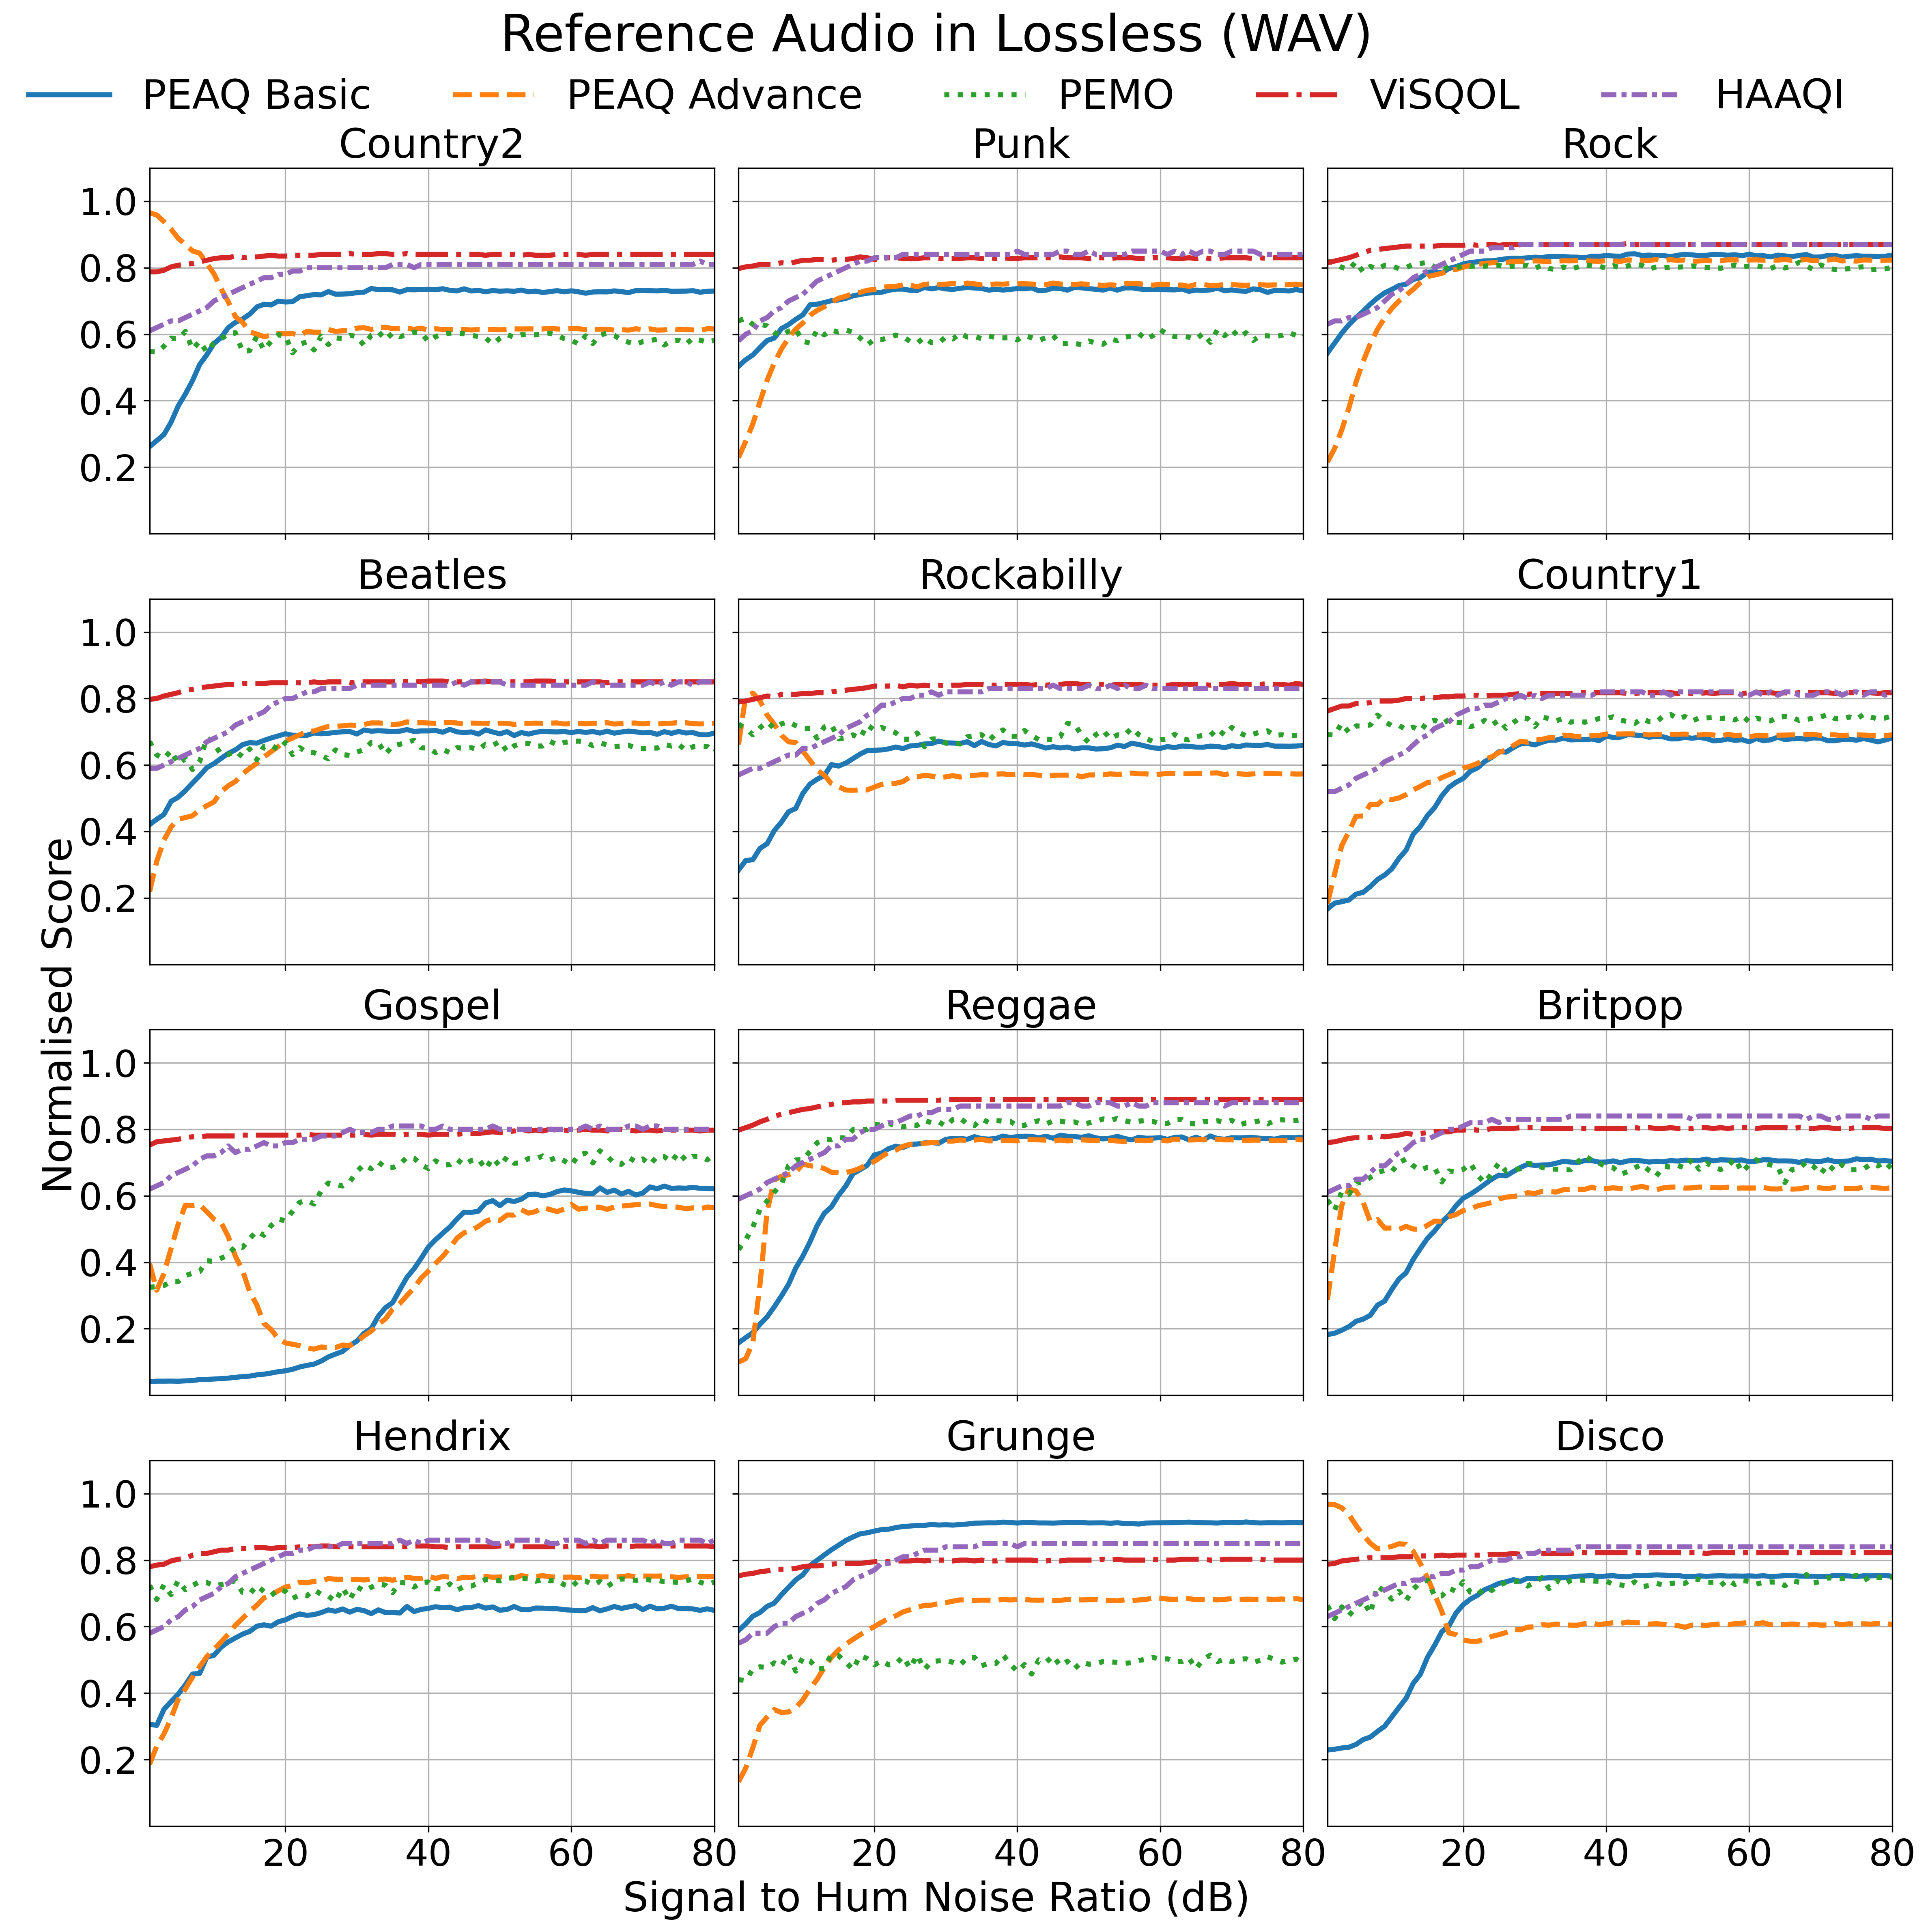

In [23]:
import matplotlib.pyplot as plt

# number of rows and cols
nrows, ncols = 4, 3

# make figsize roughly square: for example 4″ per row, 4″ per column
fig, axes = plt.subplots(nrows, ncols, 
                         figsize=(16,16), 
                         sharex=True, sharey=True, dpi=300)


# flatten axes array to index easily
axes_flat = axes.flatten()
fig.suptitle('Reference Audio in Lossless (WAV)', fontsize=suptitle_font, y=1.015)

# Plot into each subplot, turn off any unused ones
for ax, proj_name in zip(axes_flat, project_names):
    dfs = data_wav[proj_name]
    for df, lbl, style in zip(dfs, metric_labels, line_styles):
        ax.plot(df['Hum SNR'], df['score'], linestyle=style,
                label=lbl, linewidth=linewidth)
        ax.set_title(f'{proj_name}', fontsize=title_font)
        ax.grid(True)
#        ax.legend(fontsize=legend_font)
        ax.set_xlim([1, 80])  # Display x-axis values between 1 and 80
        ax.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        ax.tick_params(axis='both', labelsize=labelsize_font) 

# disable any extra subplots (if you have fewer than 12 projects)
for ax in axes_flat[len(project_names):]:
    ax.axis('off')
handles, labels = axes_flat[0].get_legend_handles_labels()
fig.legend(handles, labels,
               loc='upper center',    # anywhere you like
               ncol=len(metric_labels),
               frameon=False,
               bbox_to_anchor=(0.5, 1.00),
               fontsize=legend_font)
# Labels on the outside
fig.text(0.5, 0.04, 'Signal to Hum Noise Ratio (dB)', ha='center', fontsize=fig_font)
fig.text(0.04, 0.5, 'Normalised Score', va='center', rotation='vertical', fontsize=fig_font)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # leave space for the shared labels
plt.show()



### HUM PLOT on MP3

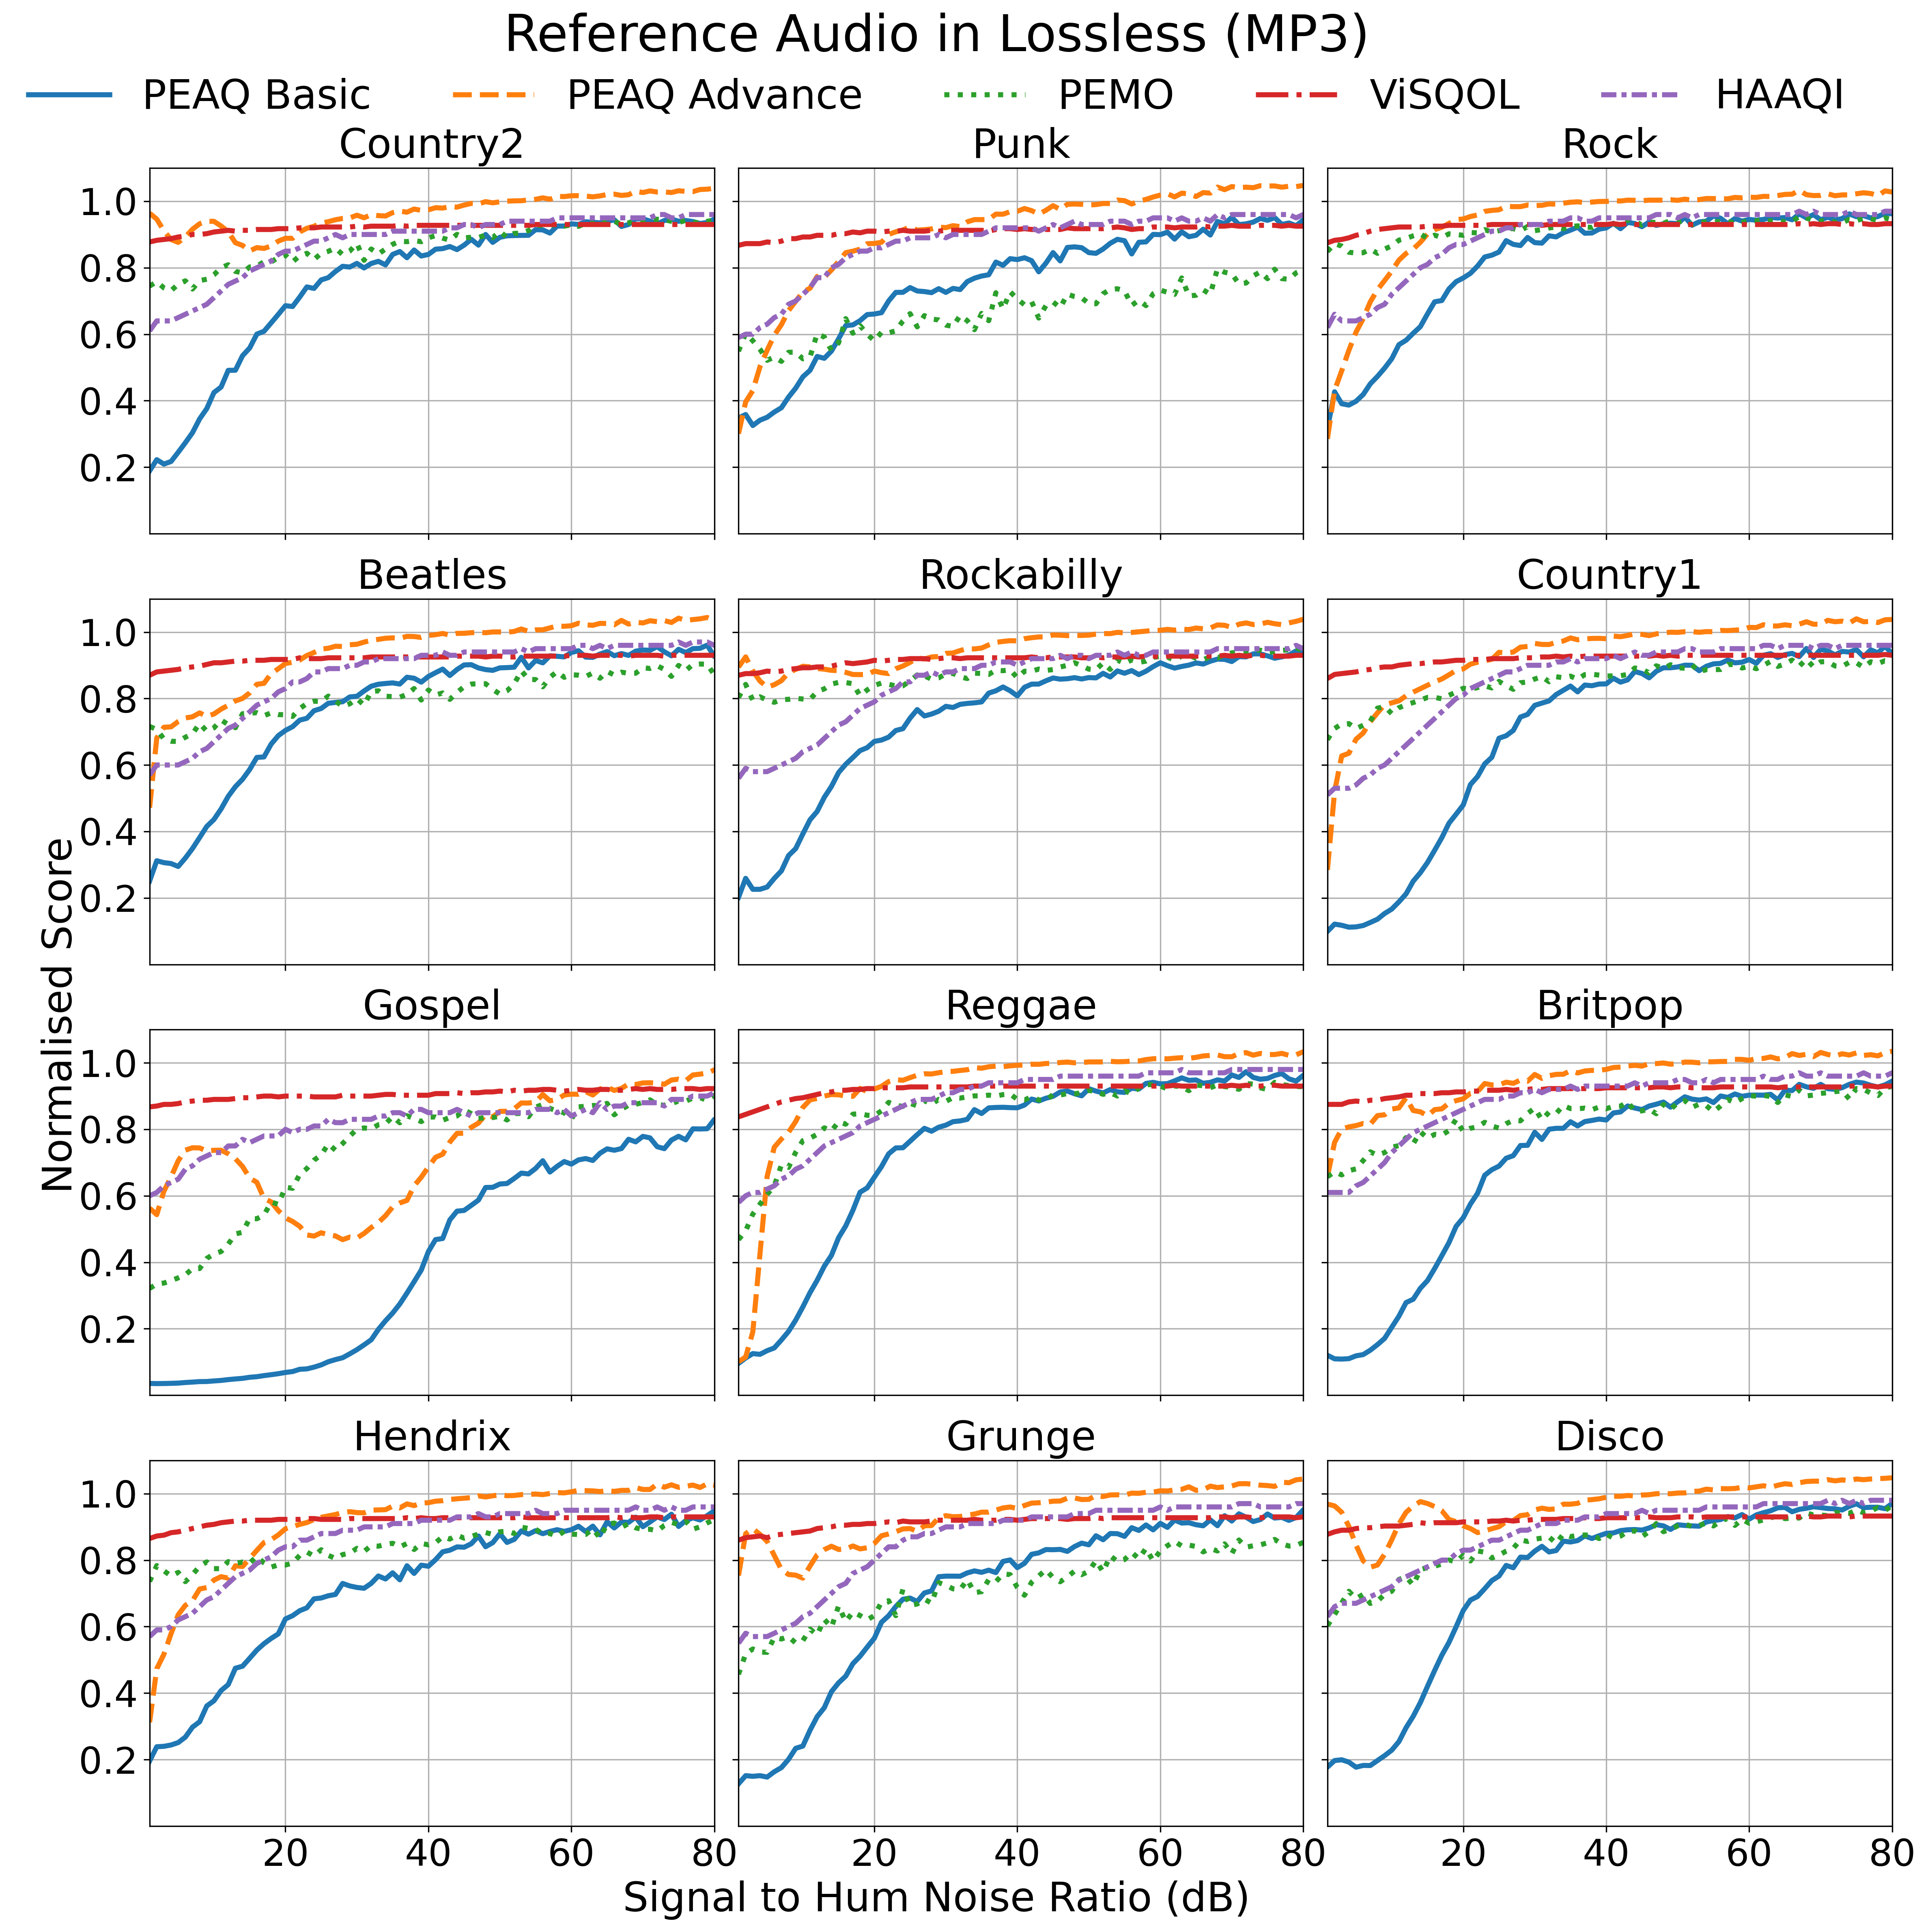

In [4]:
import matplotlib.pyplot as plt

# number of rows and cols
nrows, ncols = 4, 3

# make figsize roughly square: for example 4″ per row, 4″ per column
fig, axes = plt.subplots(nrows, ncols, 
                         figsize=(16,16), 
                         sharex=True, sharey=True, dpi=300)

# flatten axes array to index easily
axes_flat = axes.flatten()
fig.suptitle('Reference Audio in Lossless (MP3)', fontsize=suptitle_font, y=1.015)

# Plot into each subplot, turn off any unused ones
for ax, proj_name in zip(axes_flat, project_names):
    dfs = data_mp3[proj_name]
    for df, lbl, style in zip(dfs, metric_labels, line_styles):
        ax.plot(df['Hum SNR'], df['score'], linestyle=style,
                label=lbl, linewidth=linewidth)
        ax.set_title(f'{proj_name}', fontsize=title_font)
        ax.grid(True)
#        ax.legend(fontsize=16)
        ax.set_xlim([1, 80])  # Display x-axis values between 1 and 80
        ax.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        ax.tick_params(axis='both', labelsize=labelsize_font) 


# disable any extra subplots (if you have fewer than 12 projects)
for ax in axes_flat[len(project_names):]:
    ax.axis('off')
    
handles, labels = axes_flat[0].get_legend_handles_labels()
fig.legend(handles, labels,
               loc='upper center',    # anywhere you like
               ncol=len(metric_labels),
               frameon=False,
               bbox_to_anchor=(0.5, 1.00),
               fontsize=legend_font)
# Labels on the outside
fig.text(0.5, 0.04, 'Signal to Hum Noise Ratio (dB)', ha='center', fontsize=fig_font)
fig.text(0.04, 0.5, 'Normalised Score', va='center', rotation='vertical', fontsize=fig_font)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # leave space for the shared labels
plt.show()


## White noise

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Configuration
top_dir = Path(Base_Fold)       # e.g. 'Dataset/PEAQ'
metric_files = [
    ('PEAQ Basic',   'peaq_basic.csv',   'WhiteNoise SNR',       'score'),
    ('PEAQ Advance', 'peaq_advance.csv', 'WhiteNoise SNR',       'score'),
    ('PEMO',         'pemo.csv',         'WhiteNoise SNR',       'score'),
    ('ViSQOL',       'visqol.csv',       'WhiteNoise SNR',       'score'),
    ('HAAQI',        'haaqi.csv',        'WhiteNoise SNR',  'score')
]

# List all project folders except 'Avg'
projects = [d for d in top_dir.iterdir() if d.is_dir() and d.name != 'Avg']
project_names = [p.name for p in projects]

# Line styles for the metrics
line_styles = ['-','--',':','-.',(0,(3,1,1,1))]
metric_labels = [m[0] for m in metric_files]

# Prepare containers: {proj_name: [df_wav1, df_wav2, ...]}
data_wav = {}
data_mp3 = {}

for proj in projects:
    wav_dfs = []
    mp3_dfs = []
    for label, fname, snr_col, score_col in metric_files:
        path = proj / fname
        # WAV reference cols
        df_w = pd.read_csv(path, usecols=[snr_col, f'{score_col}.1'])
        df_w.columns = ['WhiteNoise SNR', 'score']
        # MP3 reference cols (suffix '.1', '.4')
        df_m = pd.read_csv(path, usecols=[f'{snr_col}.1', f'{score_col}.6'])
        df_m.columns = ['WhiteNoise SNR', 'score']
        # Normalize where needed
        if label in ('PEAQ Basic','PEAQ Advance','PEMO','ViSQOL'):
            df_w['score'] = (df_w['score'] + 4) / 4
            df_m['score'] = (df_m['score'] + 4) / 4
        # HAAQI stays as is
        wav_dfs.append(df_w)
        mp3_dfs.append(df_m)
    data_wav[proj.name] = wav_dfs
    data_mp3[proj.name] = mp3_dfs


### Whitenoise plot on WAV

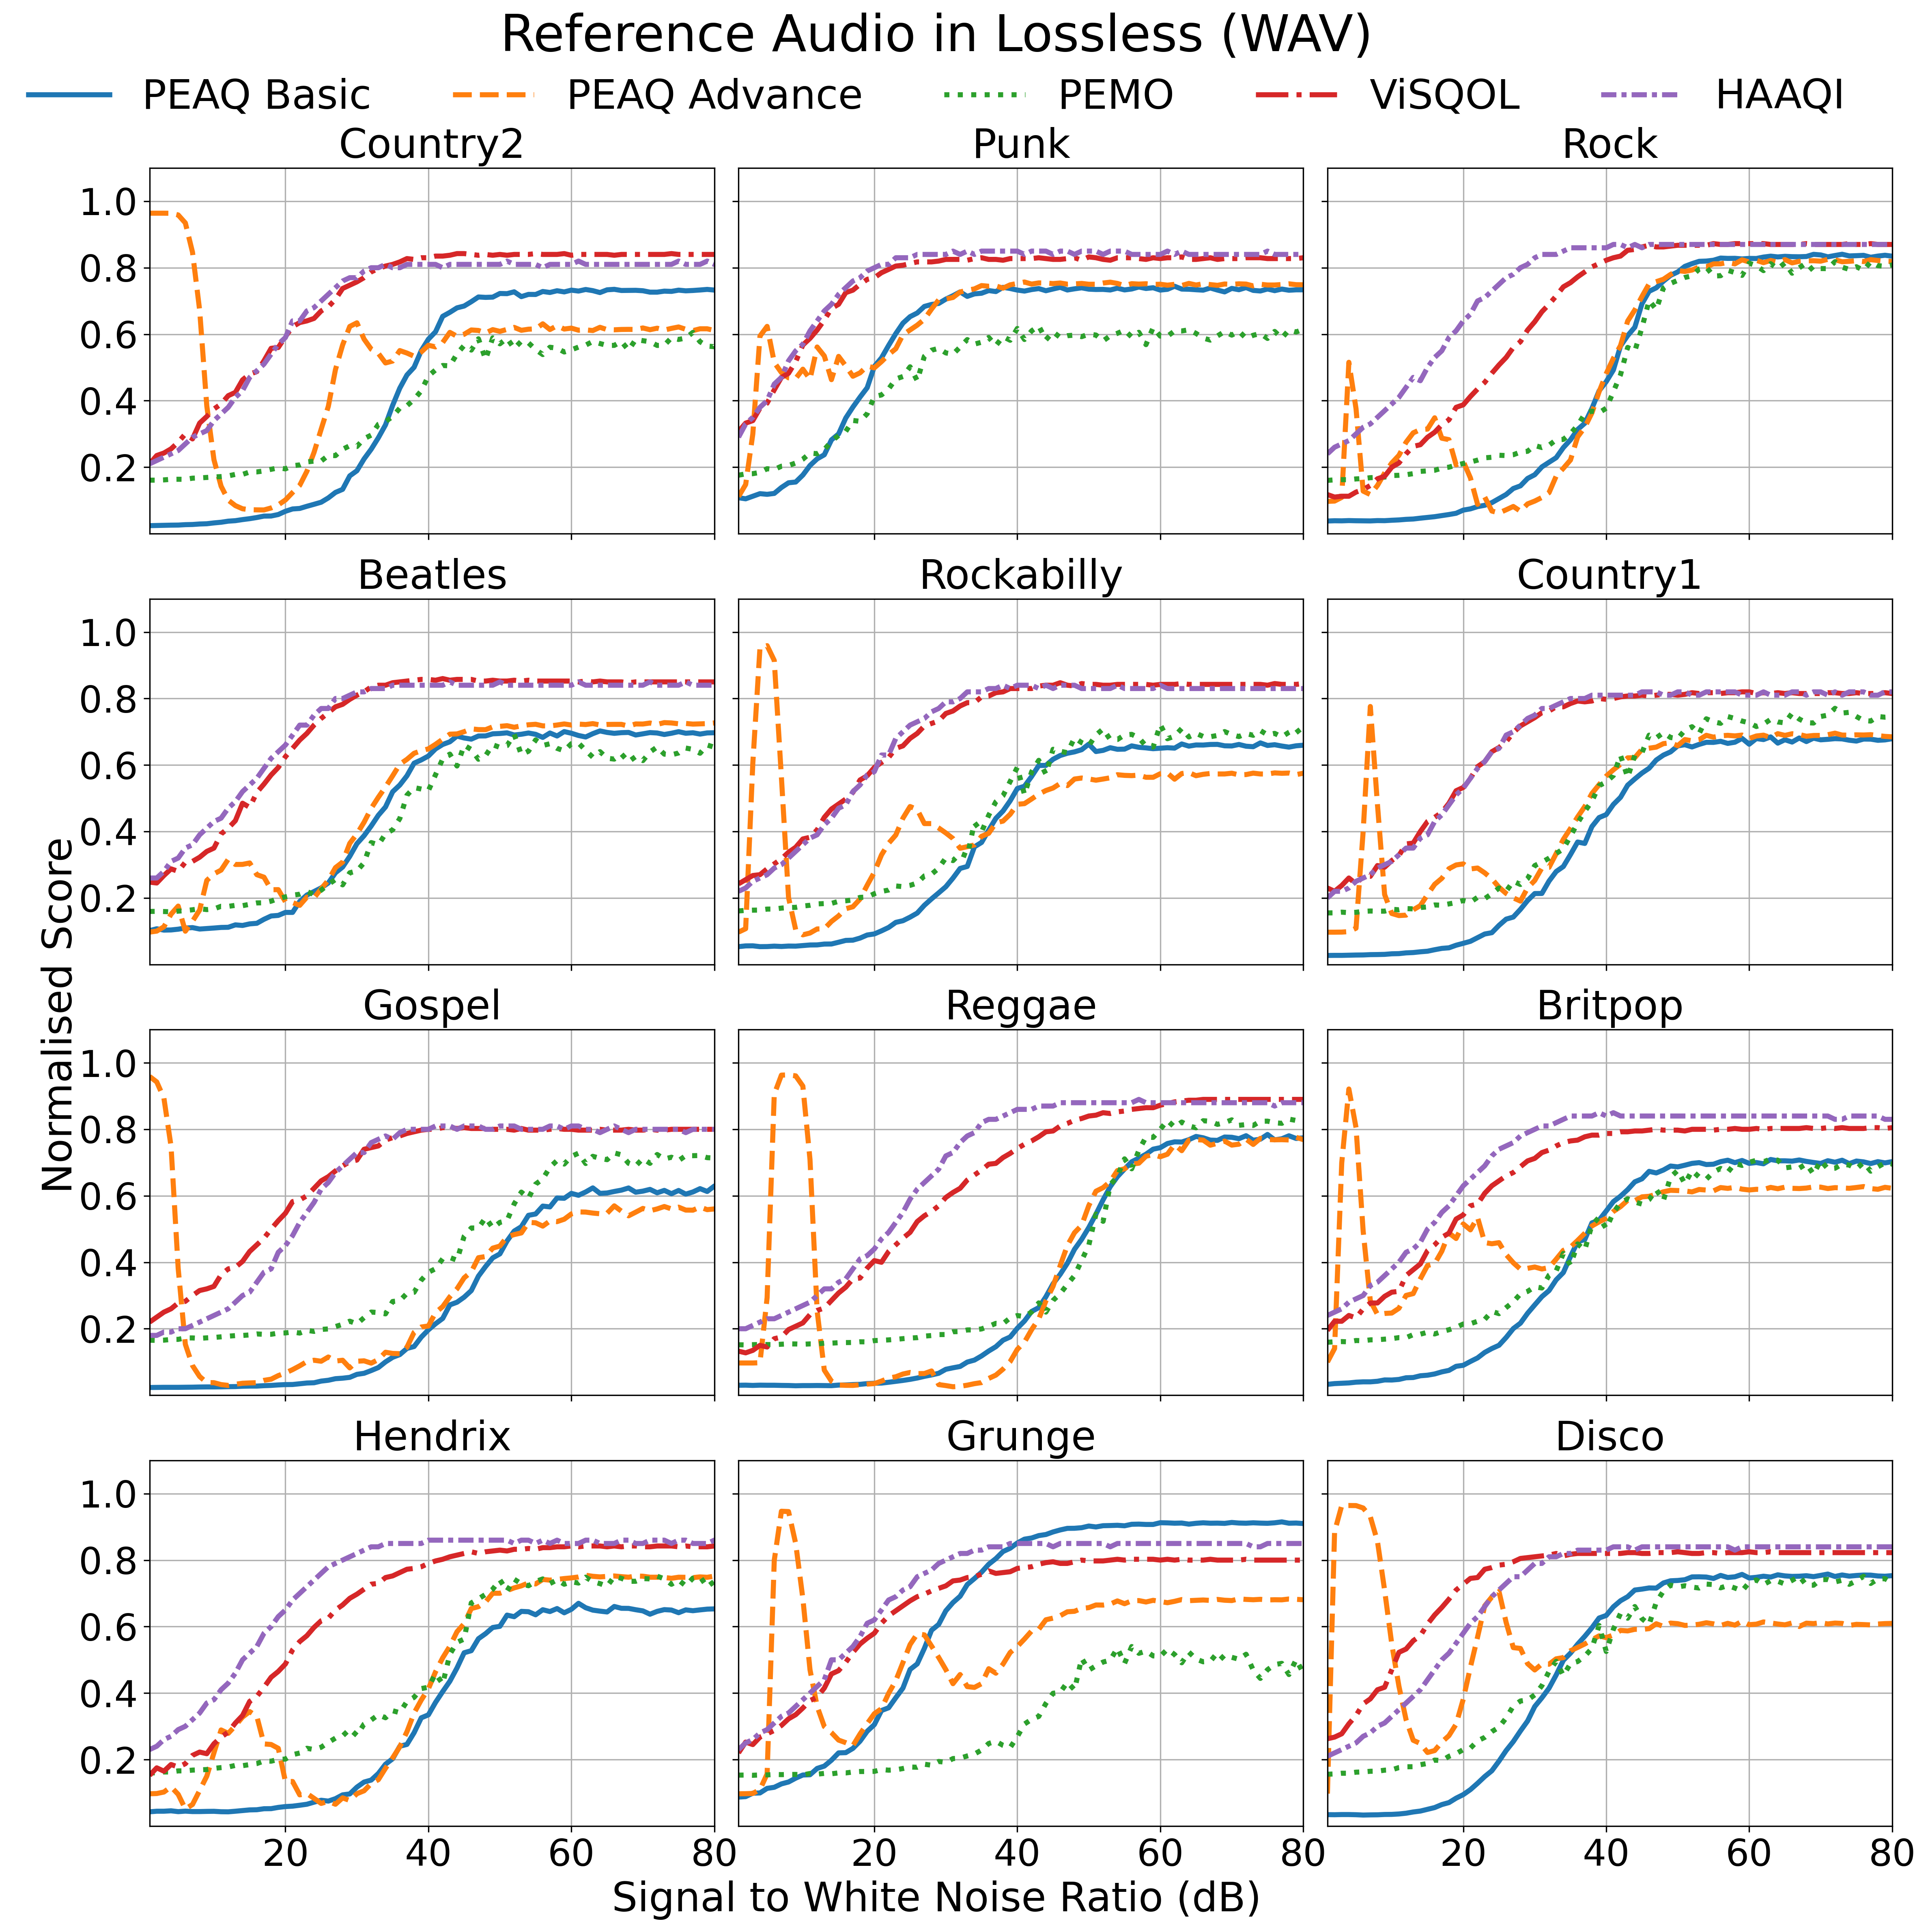

In [31]:
import matplotlib.pyplot as plt

# number of rows and cols
nrows, ncols = 4, 3

# make figsize roughly square: for example 4″ per row, 4″ per column
fig, axes = plt.subplots(nrows, ncols, 
                         figsize=(16,16), 
                         sharex=True, sharey=True, dpi=300)


# flatten axes array to index easily
axes_flat = axes.flatten()
fig.suptitle('Reference Audio in Lossless (WAV)', fontsize=suptitle_font, y=1.015)

# Plot into each subplot, turn off any unused ones
for ax, proj_name in zip(axes_flat, project_names):
    dfs = data_wav[proj_name]
    for df, lbl, style in zip(dfs, metric_labels, line_styles):
        ax.plot(df['WhiteNoise SNR'], df['score'], linestyle=style,
                label=lbl, linewidth=linewidth)
        ax.set_title(f'{proj_name}', fontsize=title_font)
        ax.grid(True)
#        ax.legend(fontsize=legend_font)
        ax.set_xlim([1, 80])  # Display x-axis values between 1 and 80
        ax.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        ax.tick_params(axis='both', labelsize=labelsize_font) 

# disable any extra subplots (if you have fewer than 12 projects)
for ax in axes_flat[len(project_names):]:
    ax.axis('off')
handles, labels = axes_flat[0].get_legend_handles_labels()
fig.legend(handles, labels,
               loc='upper center',    # anywhere you like
               ncol=len(metric_labels),
               frameon=False,
               bbox_to_anchor=(0.5, 1.00),
               fontsize=legend_font)
# Labels on the outside
fig.text(0.5, 0.04, 'Signal to White Noise Ratio (dB)', ha='center', fontsize=fig_font)
fig.text(0.04, 0.5, 'Normalised Score', va='center', rotation='vertical', fontsize=fig_font)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # leave space for the shared labels
plt.show()



### Whitenoise plot on MP3

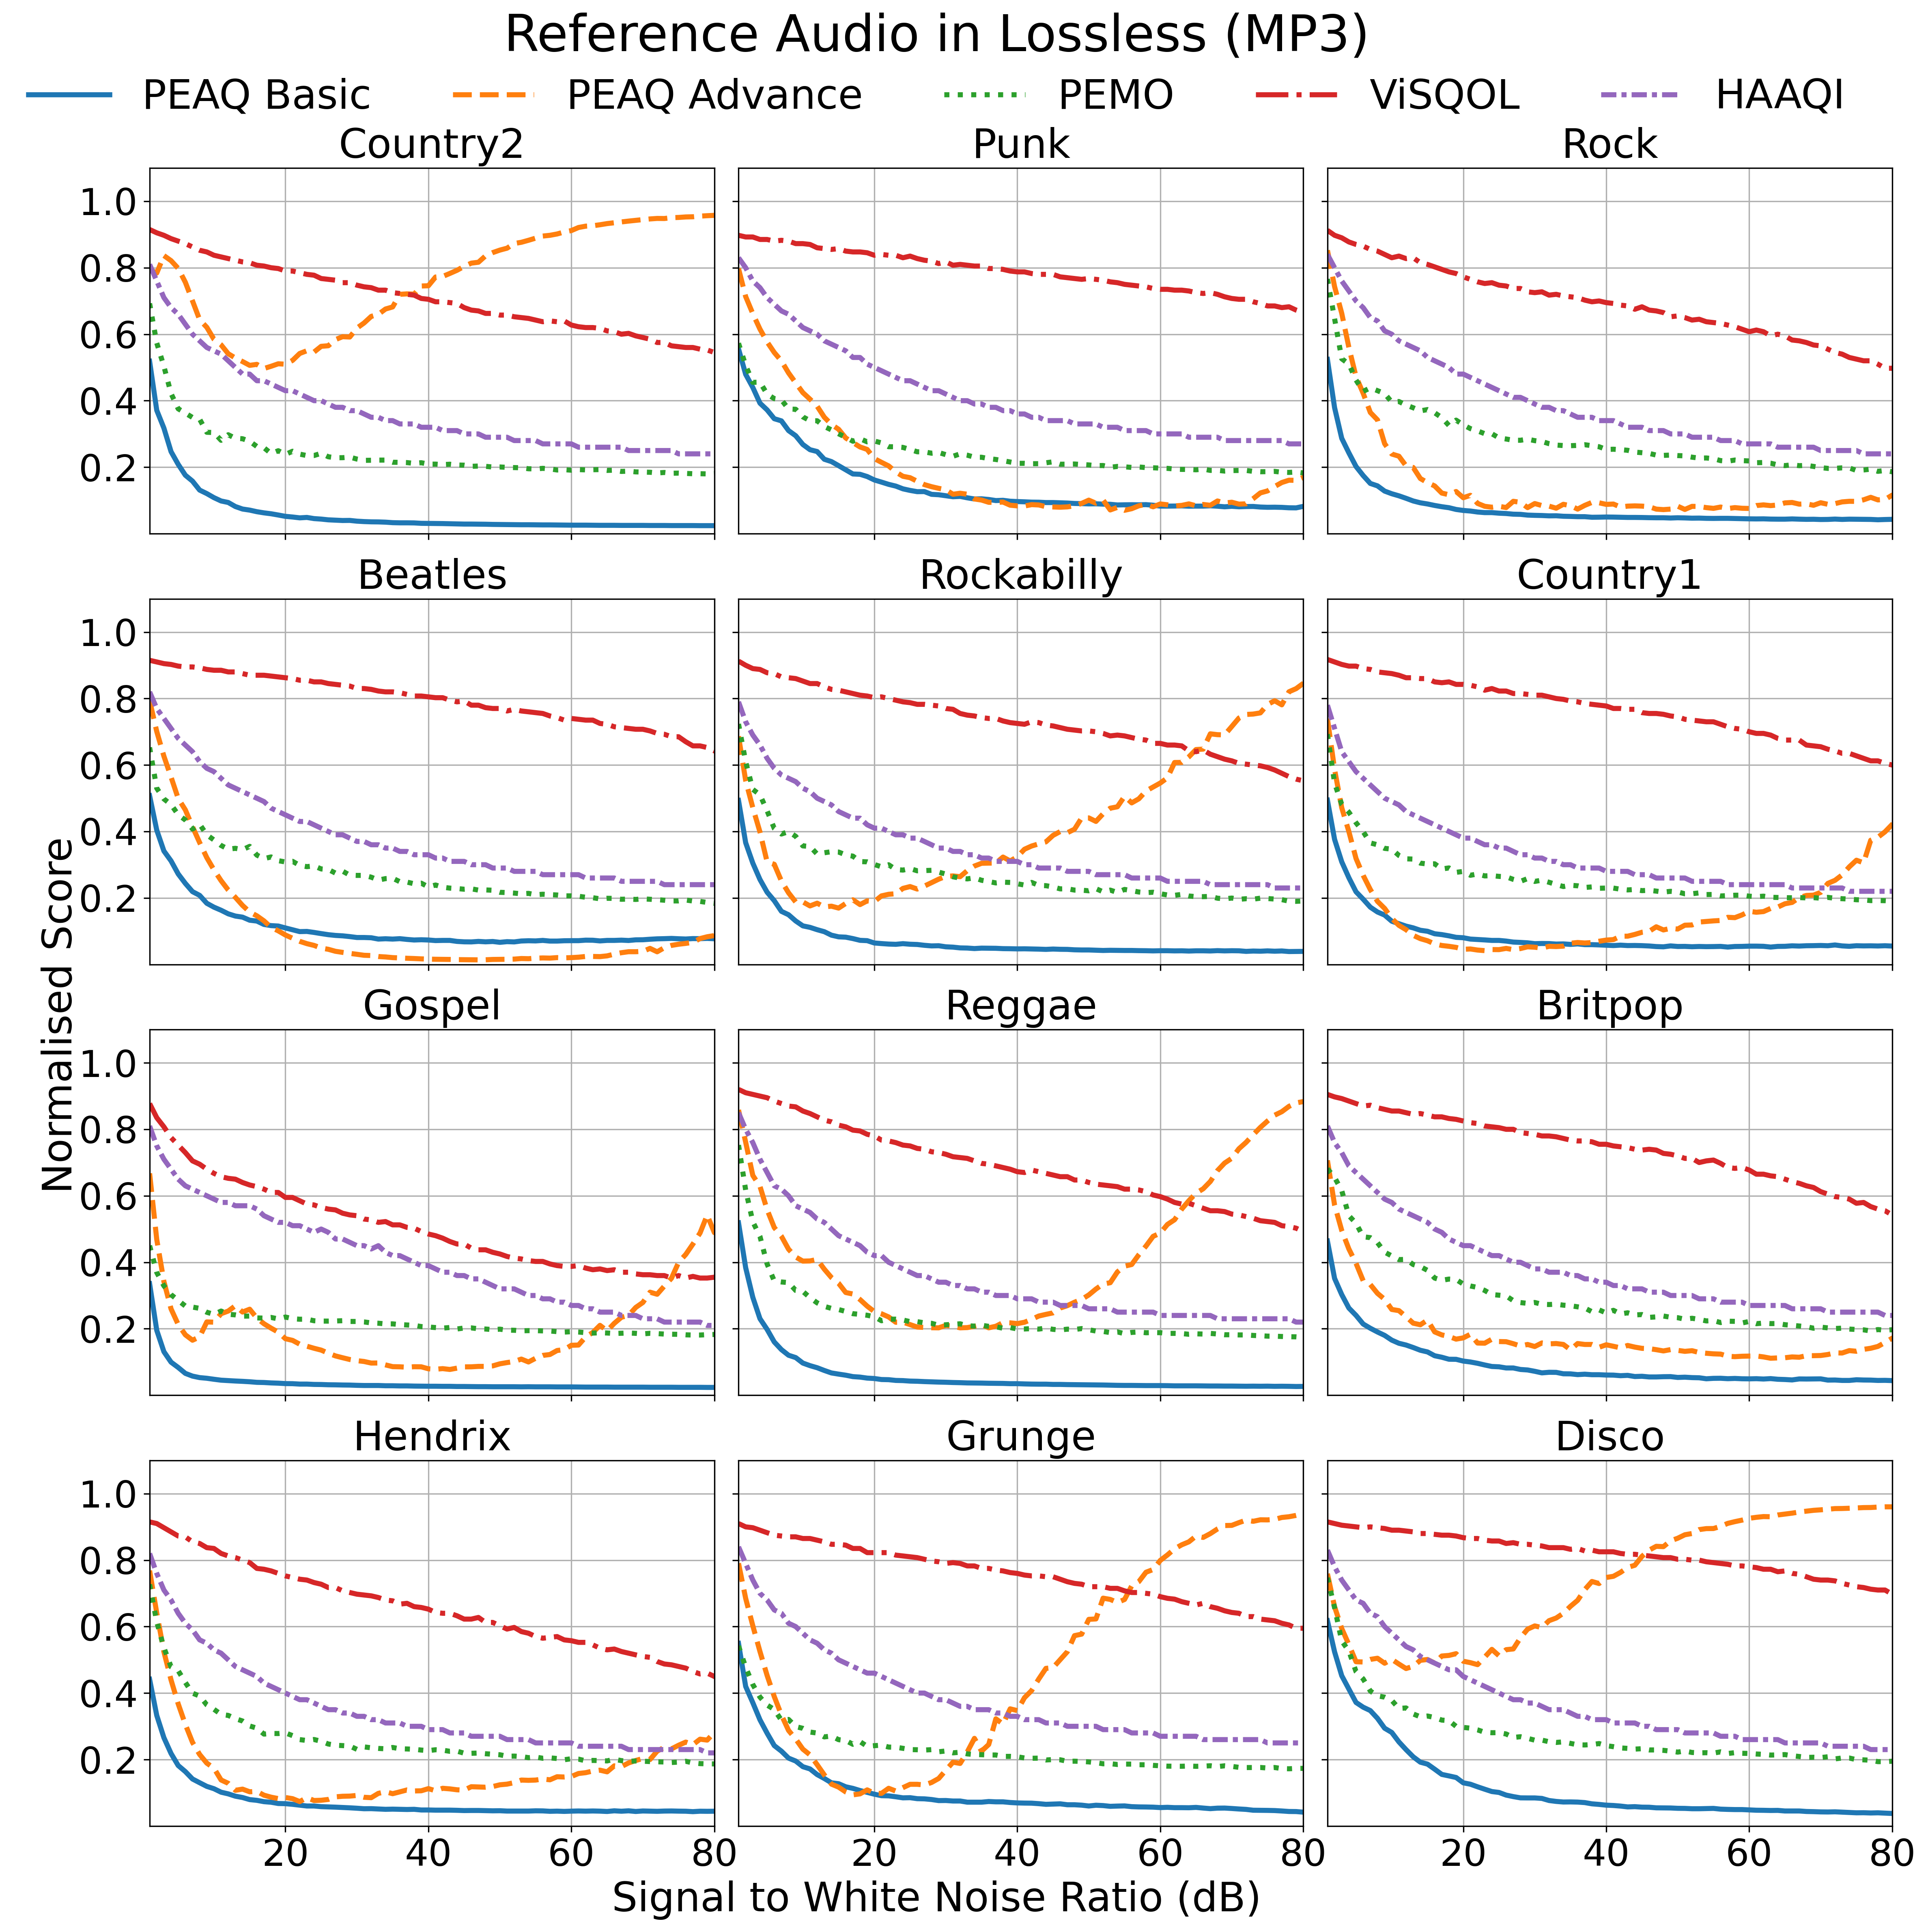

In [6]:
import matplotlib.pyplot as plt

# number of rows and cols
nrows, ncols = 4, 3

# make figsize roughly square: for example 4″ per row, 4″ per column
fig, axes = plt.subplots(nrows, ncols, 
                         figsize=(16,16), 
                         sharex=True, sharey=True, dpi=300)

# flatten axes array to index easily
axes_flat = axes.flatten()
fig.suptitle('Reference Audio in Lossless (MP3)', fontsize=suptitle_font, y=1.015)

# Plot into each subplot, turn off any unused ones
for ax, proj_name in zip(axes_flat, project_names):
    dfs = data_mp3[proj_name]
    for df, lbl, style in zip(dfs, metric_labels, line_styles):
        ax.plot(df['WhiteNoise SNR'], df['score'], linestyle=style,
                label=lbl, linewidth=linewidth)
        ax.set_title(f'{proj_name}', fontsize=title_font)
        ax.grid(True)
#        ax.legend(fontsize=16)
        ax.set_xlim([1, 80])  # Display x-axis values between 1 and 80
        ax.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        ax.tick_params(axis='both', labelsize=labelsize_font) 


# disable any extra subplots (if you have fewer than 12 projects)
for ax in axes_flat[len(project_names):]:
    ax.axis('off')
    
handles, labels = axes_flat[0].get_legend_handles_labels()
fig.legend(handles, labels,
               loc='upper center',    # anywhere you like
               ncol=len(metric_labels),
               frameon=False,
               bbox_to_anchor=(0.5, 1.00),
               fontsize=legend_font)
# Labels on the outside
fig.text(0.5, 0.04, 'Signal to White Noise Ratio (dB)', ha='center', fontsize=fig_font)
fig.text(0.04, 0.5, 'Normalised Score', va='center', rotation='vertical', fontsize=fig_font)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # leave space for the shared labels
plt.show()


## Clip

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Configuration
top_dir = Path(Base_Fold)       # e.g. 'Dataset/PEAQ'
metric_files = [
    ('PEAQ Basic',   'peaq_basic.csv',   'Clipping Percentage(%)',       'score'),
    ('PEAQ Advance', 'peaq_advance.csv', 'Clipping Percentage(%)',       'score'),
    ('PEMO',         'pemo.csv',         'Clipping Percentage',       'score'),
    ('ViSQOL',       'visqol.csv',       'Clipping Percentage(%)',       'score'),
    ('HAAQI',        'haaqi.csv',        'Clipping Percentage(%)',  'score')
]

# List all project folders except 'Avg'
projects = [d for d in top_dir.iterdir() if d.is_dir() and d.name != 'Avg']
project_names = [p.name for p in projects]

# Line styles for the metrics
line_styles = ['-','--',':','-.',(0,(3,1,1,1))]
metric_labels = [m[0] for m in metric_files]

# Prepare containers: {proj_name: [df_wav1, df_wav2, ...]}
data_wav = {}
data_mp3 = {}

for proj in projects:
    wav_dfs = []
    mp3_dfs = []
    for label, fname, snr_col, score_col in metric_files:
        path = proj / fname
        # WAV reference cols
        df_w = pd.read_csv(path, usecols=[snr_col, score_col])
        df_w.columns = ['Clipping Percentage', 'score']
        # MP3 reference cols (suffix '.1', '.4')
        df_m = pd.read_csv(path, usecols=[f'{snr_col}.1', f'{score_col}.6'])
        df_m.columns = ['Clipping Percentage', 'score']
        # Normalize where needed
        if label in ('PEAQ Basic','PEAQ Advance','PEMO','ViSQOL'):
            df_w['score'] = (df_w['score'] + 4) / 4
            df_m['score'] = (df_m['score'] + 4) / 4
        # HAAQI stays as is
        wav_dfs.append(df_w)
        mp3_dfs.append(df_m)
    data_wav[proj.name] = wav_dfs
    data_mp3[proj.name] = mp3_dfs



ValueError: Usecols do not match columns, columns expected but not found: ['Clipping Percentage(%)']

In [14]:
path

PosixPath('Revision_Dataset_12samples/Country2/pemo.csv')

### Clipping plot on WAV

In [ ]:
import matplotlib.pyplot as plt

# number of rows and cols
nrows, ncols = 4, 3

# make figsize roughly square: for example 4″ per row, 4″ per column
fig, axes = plt.subplots(nrows, ncols, 
                         figsize=(16,16), 
                         sharex=True, sharey=True, dpi=300)


# flatten axes array to index easily
axes_flat = axes.flatten()
fig.suptitle('Reference Audio in Lossless (WAV)', fontsize=suptitle_font, y=1.015)

# Plot into each subplot, turn off any unused ones
for ax, proj_name in zip(axes_flat, project_names):
    dfs = data_wav[proj_name]
    for df, lbl, style in zip(dfs, metric_labels, line_styles):
        ax.plot(df['Clipping Percentage(%)'], df['score'], linestyle=style,
                label=lbl, linewidth=linewidth)
        ax.set_title(f'{proj_name}', fontsize=title_font)
        ax.grid(True)
#        ax.legend(fontsize=legend_font)
        ax.set_xlim([1, 80])  # Display x-axis values between 1 and 80
        ax.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        ax.tick_params(axis='both', labelsize=labelsize_font) 

# disable any extra subplots (if you have fewer than 12 projects)
for ax in axes_flat[len(project_names):]:
    ax.axis('off')
handles, labels = axes_flat[0].get_legend_handles_labels()
fig.legend(handles, labels,
               loc='upper center',    # anywhere you like
               ncol=len(metric_labels),
               frameon=False,
               bbox_to_anchor=(0.5, 1.00),
               fontsize=legend_font)
# Labels on the outside
fig.text(0.5, 0.04, 'Clipping Percentage(%)', ha='center', fontsize=fig_font)
fig.text(0.04, 0.5, 'Normalised Score', va='center', rotation='vertical', fontsize=fig_font)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # leave space for the shared labels
plt.show()



### Clipping plot on MP3

In [ ]:
import matplotlib.pyplot as plt

# number of rows and cols
nrows, ncols = 4, 3

# make figsize roughly square: for example 4″ per row, 4″ per column
fig, axes = plt.subplots(nrows, ncols, 
                         figsize=(16,16), 
                         sharex=True, sharey=True, dpi=300)

# flatten axes array to index easily
axes_flat = axes.flatten()
fig.suptitle('Reference Audio in Lossless (MP3)', fontsize=suptitle_font, y=1.015)

# Plot into each subplot, turn off any unused ones
for ax, proj_name in zip(axes_flat, project_names):
    dfs = data_mp3[proj_name]
    for df, lbl, style in zip(dfs, metric_labels, line_styles):
        ax.plot(df['Clipping Percentage(%)'], df['score'], linestyle=style,
                label=lbl, linewidth=linewidth)
        ax.set_title(f'{proj_name}', fontsize=title_font)
        ax.grid(True)
#        ax.legend(fontsize=16)
        ax.set_xlim([1, 80])  # Display x-axis values between 1 and 80
        ax.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        ax.tick_params(axis='both', labelsize=labelsize_font) 


# disable any extra subplots (if you have fewer than 12 projects)
for ax in axes_flat[len(project_names):]:
    ax.axis('off')
    
handles, labels = axes_flat[0].get_legend_handles_labels()
fig.legend(handles, labels,
               loc='upper center',    # anywhere you like
               ncol=len(metric_labels),
               frameon=False,
               bbox_to_anchor=(0.5, 1.00),
               fontsize=legend_font)
# Labels on the outside
fig.text(0.5, 0.04, 'Clipping Percentage(%)', ha='center', fontsize=fig_font)
fig.text(0.04, 0.5, 'Normalised Score', va='center', rotation='vertical', fontsize=fig_font)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # leave space for the shared labels
plt.show()
